# Problema de la mochila

## Ejercicio 1
Implementa una función que resuelva el problema de la mochila usando fuerza bruta. Es decir, una función que calcule todas las posibilidades de la mochila y obtenga la solución comparando todas esas posibilidades. 

In [2]:
def mochila_fuerza_bruta(valor, peso, Capacidad):
    """
    Resuelve el problema de la mochila 0-1 utilizando fuerza bruta.
    
    La función evalúa todas las combinaciones posibles de objetos para determinar
    la solución óptima, es decir, el conjunto de objetos que maximiza el valor total
    sin exceder la capacidad dada.
    
    Parámetros:
      valor (list[int]): Lista de valores de los objetos.
      peso (list[int]): Lista de pesos de los objetos.
      Capacidad (int): Capacidad máxima de la mochila.
    
    Retorna:
      tuple: (max_valor, objetos_incluidos) donde max_valor es el valor máximo obtenido y
             objetos_incluidos es la lista de índices de los objetos seleccionados.
    """
    n = len(valor)
    valor_max = 0
    objetos_incluidos = []
    # Itera sobre todas las combinaciones posibles (2^n)
    for subconjunto in range(1 << n):  # Equivale a 2**n
        valor_actual = 0
        peso_actual = 0
        objetos_actuales = []
        for j in range(n):
            # Si el j-ésimo bit está encendido en subconjunto, se incluye el objeto j
            if subconjunto & (1 << j):
                valor_actual += valor[j]
                peso_actual += peso[j]
                objetos_actuales.append(j)
        # Actualiza la solución si la combinación es válida y mejora el valor acumulado
        if peso_actual <= Capacidad and valor_actual > valor_max:
            valor_max = valor_actual
            objetos_incluidos = objetos_actuales
    return valor_max, objetos_incluidos


## Ejercicio 2
Adapta la funcion `tiemposDeEjecucion(f,n)` creada en la clase del 14 de febrero en el archivo [ProgramacionDinamica.ipynb](./ProgramacionDinamica.ipynb) para comparar las funciones:
- `mochila_fuerza_bruta`
- `mochila_01`

Es decir, debes hacer una función `tiemposDeEjecucion(f,valor, peso, Capacidad)`.

Usa la función `pruebas_mochila` para obtener datos con que comparar. Crea al menos 3 conjuntos de datos de a lo mas 10 elementos para comparar los tiempos de ejecución. 

**Nota:** El parámetro `semilla` en la función `pruebas_mochila` sirve para generar los mismos datos. Así, por ejemplo si dejamos el argumento `semilla` implicito (sin asignarle valor): `pruebas_mochila(10)` siempre generara los mismos datos. Si cambiamos el parámetro(`pruebas_mochila(10,123456789)`) se generaran nuevos datos por cada semilla que pongamos.

## Ejercicio 2.2
Implementa un `docstring` a la función `tiemposDeEjecucion(f,valor, peso, Capacidad)`.

In [3]:
import random
def pruebas_mochila(n,semilla = 17022025):
    """
    Genera un caso de prueba para el problema de la mochila utilizando fuerza bruta.
    
    Se generan 'n' objetos con valores y pesos aleatorios y se define una capacidad basada en la suma de los pesos.
    
    Parámetros:
      n (int): Número de objetos.
      
    Retorna:
      tuple: (valor, peso, Capacidad) donde valor y peso son listas de 'n' elementos con los valores y pesos de los objetos,
             respectivamente, y Capacidad es la capacidad máxima de la mochila
    """
    
    random.seed(semilla) # Fijar la semilla para reproducibilidad
    valor = [random.randint(1, 50) for _ in range(n)]
    peso = [random.randint(1, 20) for _ in range(n)]
    Capacidad = sum(peso) // 2  # Capacidad definida como la mitad de la suma de los pesos
    return valor, peso, Capacidad


## Medición de los tiempos de ejecución
Para realizar esta medición lo que hacemos es dados los datos del problema de la mochila: `valor, peso, Capacidad` tomamos los tiempos de ejecución para todos los subproblemas aumentando los objetos y tomando una Capacidad constante. Es decir, vamos aumentando objetos y midiendo la ejecución del problema con esos objetos hasta incluir todos los objetos. 

In [ ]:
import time
def tiemposDeEjecucion(f, valor, peso, Capacidad):
    n = len(valor)
    tiempos = []
    for i in range(n + 1):
        tiempo_inicio = time.time()
        f(valor[:i], peso[:i], Capacidad)
        tiempo_final = time.time()
        tiempos.append(tiempo_final - tiempo_inicio)
    return tiempos

## Mochila con programación dinámica

In [5]:
def mochila_01(valor, peso, Capacidad):
    """
    Resuelve el problema de la mochila 0-1 usando programación dinámica.
    
    Se asume que:
      - valor es una lista de enteros que representa el valor de cada objeto.
      - peso es una lista de enteros que representa el peso de cada objeto.
      - Capacidad es un entero positivo que representa la capacidad máxima de la mochila.
    
    Parámetros:
      valor (list of int): Valores de los objetos.
      peso (list of int): Pesos de los objetos.
      Capacidad (int): Capacidad máxima de la mochila.
      
    Retorna:
      int: El valor máximo acumulado que se puede obtener con la capacidad dada.
      list of list of int: La tabla de programación dinámica utilizada para la solución.
    
    Ejemplo:
      >>> valor = [6, 12, 10, 2] 
      >>> peso = [1, 3, 2, 4]
      >>> Capacidad = 5
      >>> max_valor, tabla = mochila_01(valor, peso, Capacidad)
      >>> print("La tabla es:\n",*tabla, sep="\n")
      
      El valor máximo acumulado es: 22
      La tabla es:

      [0, 0, 0, 0, 0, 0]
      [0, 6, 6, 6, 6, 6]
      [0, 6, 6, 12, 18, 18]
      [0, 6, 10, 16, 18, 22]
      [0, 6, 10, 16, 18, 22]
    """
    valor.insert(0,0) # Se inserta un valor ficticio en la posición 0 (Casos base).
    peso.insert(0,0)  # Se inserta un valor ficticio en la posición 0 (Casos Base).
    n = len(valor) - 1  # Se asume que valor y peso tienen n+1 elementos (posición 0 sin usar)

    # Crear la tabla m[0..n][0..Capacidad] inicializada a 0
    m = [[0 for _ in range(Capacidad + 1)] for _ in range(n + 1)]
    """
    Ejemplo de tabla:
    Capacidad = 3
    n = 4
    [[0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]
    """
   
    # Inicialización:
    # Para subcapacidad desde 0 hasta Capacidad, m[0][subcapacidad] ya es 0.
    # Para objeto desde 0 hasta n, m[objeto][0] ya es 0.
    
    # Llenar la tabla con programación dinámica
    for objeto in range(1, n + 1):
        for subcapacidad in range(1, Capacidad + 1):
            if peso[objeto] > subcapacidad:
                m[objeto][subcapacidad] = m[objeto - 1][subcapacidad]
            else:
                m[objeto][subcapacidad] = max(
                    m[objeto - 1][subcapacidad],
                    m[objeto - 1][subcapacidad - peso[objeto]] + valor[objeto]
                )
                
    return m[n][Capacidad], m


## Pruebas y comparación 

Text(0.5, 1.0, 'Comparación tiempo de ejecución del algoritmo de la mochila')

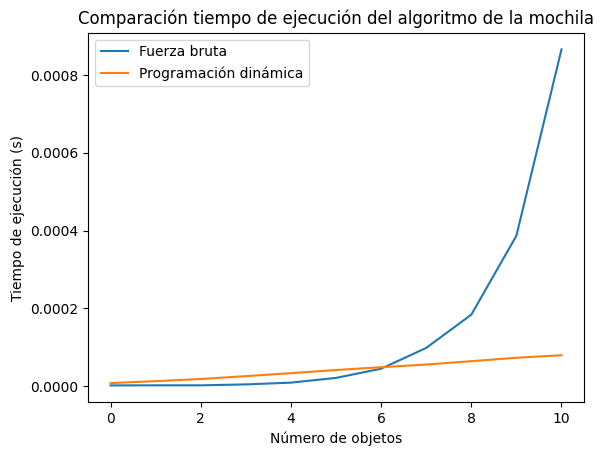

In [ ]:
# Pruebas
n = 10
valor, peso, Capacidad = pruebas_mochila(n)
# Se obtienen los tiempos de ejecución para cada tamaño de entrada
tiempos_fuerza_bruta = tiemposDeEjecucion(mochila_fuerza_bruta, valor, peso, Capacidad)

tiempos_pogramacion_din = tiemposDeEjecucion(mochila_01, valor, peso, Capacidad)

# Gráfica
import matplotlib.pyplot as plt 
plt.plot(range(n + 1), tiempos_fuerza_bruta, label="Fuerza bruta")
plt.plot(range(n + 1), tiempos_pogramacion_din, label="Programación dinámica")
plt.legend()
plt.xlabel("Número de objetos")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación tiempo de ejecución del algoritmo de la mochila")

## Ejercicio Extra
Implementa el algoritmo de la mochila con programación dinámica en c++.

```cpp
#include <iostream>
#include <vector>
using namespace std;

// Función para resolver el problema de la mochila 0-1 usando programación dinámica
pair<int, vector<vector<int>>> mochila_01(vector<int> valor, vector<int> peso, int Capacidad) {
    // Se inserta un valor ficticio en la posición 0 para manejar los casos base
    valor.insert(valor.begin(), 0);
    peso.insert(peso.begin(), 0);
    int n = valor.size() - 1; // Número de objetos
    
    // Crear la tabla m[0..n][0..Capacidad] inicializada a 0
    vector<vector<int>> m(n + 1, vector<int>(Capacidad + 1, 0));
    
    // Llenar la tabla con programación dinámica
    for (int objeto = 1; objeto <= n; objeto++) {
        for (int subcapacidad = 1; subcapacidad <= Capacidad; subcapacidad++) {
            if (peso[objeto] > subcapacidad) {
                m[objeto][subcapacidad] = m[objeto - 1][subcapacidad];
            } else {
                m[objeto][subcapacidad] = max(
                    m[objeto - 1][subcapacidad], 
                    m[objeto - 1][subcapacidad - peso[objeto]] + valor[objeto]
                );
            }
        }
    }
    
    // Retornar el valor máximo acumulado y la tabla de programación dinámica
    return {m[n][Capacidad], m};
}

int main() {
    // Datos de entrada: valores, pesos y capacidad máxima
    vector<int> valor = {6, 12, 10, 2}; 
    vector<int> peso = {1, 3, 2, 4};
    int Capacidad = 5;
    
    // Llamada a la función
    pair<int, vector<vector<int>>> resultado = mochila_01(valor, peso, Capacidad);
    int max_valor = resultado.first;
    vector<vector<int>> tabla = resultado.second;
    
    // Mostrar el valor máximo acumulado
    cout << "El valor maximo acumulado es: " << max_valor << endl;
    cout << "La tabla de programación dinamica es: " << endl;
    
    // Mostrar la tabla de programación dinámica
    for (int i = 0; i < tabla.size(); i++) {
        for (int j = 0; j < tabla[i].size(); j++) {
            cout << tabla[i][j] << " ";
        }
        cout << endl;
    }
    
    return 0;
}
```

El archivo esta guardado como [Mochila.cpp](./../ProblemaDeLaMochila/Mochila.cpp)

## Mochila Fuerza bruta en C++